# **Gene Expression Analysis**

In this ipython notebook, cancer gene expression is analyzed from the CCLE database in order to identify the relative expression of CKLF and 40 chemokine markers associated with cancer. 

Data was obtained via 2 files:
1.   sample_info.csv - demographic information and cell line details
2.   CCLE_expression.csv - tpm gene expression values for variety of genes

In [ ]:
#import statements from various python libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd, statistics, matplotlib.pyplot as plt, math, numpy as np
from scipy import stats
import glob
import os
import numpy as np

Mounted at /content/drive


# Create Excel Sheets for Relative Chemokine Expression of Each Cancer Type

In [ ]:
#import input files
path = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/'
CCLE_df =pd.read_csv(path + 'Input/CCLE_expression.csv', header=0)
path = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/'
sample_info =pd.read_csv(path + 'Input/sample_info.csv', header=0)
#summary_df = pd.read_excel(path + 'Output/Cancer Summary/Summary_template.xlsx', header=0)
gene_df = pd.read_excel(path + 'Input/Gene list.xlsx', header=0)
gene_list = gene_df.columns.tolist()

In [ ]:
#helper functions
def get_cell_lines(cancer_type):
  cancer_df = sample_info[sample_info['lineage_subtype'] == cancer_type]
  cell_lines = cancer_df.stripped_cell_line_name.tolist()
  cell_lines.sort()
  return cell_lines

def get_correlated_gene_columns(gene_list):
  gene_list_formatted = [g + ' ' for g in gene_list]
  CCLE_genes = []

  for g in gene_list_formatted:
    for c in CCLE_df.columns[1:].tolist():
      if g in c:
        CCLE_genes += [c]
  return CCLE_genes

def clean_CCLE_df(df, gene_list):
  CCLE_df = df.rename(columns={"Unnamed: 0": "Cell Line"})
  CCLE_genes = get_correlated_gene_columns(gene_list)
  CCLE_cols = ['Cell Line'] + CCLE_genes
  cleaned_CCLE = CCLE_df[CCLE_cols]
  return cleaned_CCLE

def get_fullname_cell_lines(cancer_cell_lines):
  cell_line_pairs = dict(zip(sample_info['stripped_cell_line_name'], sample_info['DepMap_ID'],))
  fullname_cell_lines = [cell_line_pairs[c] for c in cancer_cell_lines]
  pairs_inverted = {y: x for x, y in cell_line_pairs.items()}
  return fullname_cell_lines, pairs_inverted


In [ ]:
#main helper function to create an excel sheet from dataframe final_df2 with all 41 gene expression levels for all cell lines within a specific cancer category CANCER_TYPE
def get_cancer_type(CANCER_TYPE, sample_info):
  sample_info = sample_info[['stripped_cell_line_name', 'DepMap_ID', 'primary_or_metastasis', 'lineage_molecular_subtype', 'lineage_subtype']]
  cancer_cell_lines = get_cell_lines(CANCER_TYPE)
  fullname_cell_lines, pairs_inverted = get_fullname_cell_lines(cancer_cell_lines)
  CCLE_genes = get_correlated_gene_columns(gene_list)
  cleaned_CCLE = clean_CCLE_df(CCLE_df, gene_list)
  cleaned_CCLE = cleaned_CCLE[cleaned_CCLE['Cell Line'].isin(fullname_cell_lines)]
  cancer_lines_in_df = cleaned_CCLE['Cell Line'].tolist()
  abbrev_cancer_cells = [pairs_inverted[c] for c in cancer_lines_in_df]

  cleaned_CCLE.drop(columns=['Cell Line'])
  cleaned_CCLE['Cell Line'] = abbrev_cancer_cells
  first_column = cleaned_CCLE.pop('Cell Line')
  cleaned_CCLE.insert(0, 'Cell Line', first_column)
  cleaned_CCLE = cleaned_CCLE.set_index('Cell Line')
  final_df = cleaned_CCLE.sort_index()

  sample_info2 = sample_info.set_index('stripped_cell_line_name')
  sample_info2 = sample_info2.drop(columns=['lineage_subtype'])
  final_df2 = final_df.join(sample_info2)

  first_column = final_df2.pop('DepMap_ID')
  final_df2.insert(0, 'ID', first_column)

  second_column = final_df2.pop('primary_or_metastasis')
  final_df2.insert(1, 'Primary or Metastasis?', second_column)

  third_column = final_df2.pop('lineage_molecular_subtype')
  final_df2.insert(2, 'MYCN Amp?', third_column)
  final_df2.to_excel(path+ 'CCLE Database Gene Expression Output/Cancer by Cell Lines/' + CANCER_TYPE + ".xlsx")
  
  return final_df2
  

In [ ]:
  CANCER_TYPE = 'neuroblastoma'
  sample_info = sample_info[['stripped_cell_line_name', 'DepMap_ID', 'primary_or_metastasis', 'lineage_molecular_subtype', 'lineage_subtype']]
  cancer_cell_lines = get_cell_lines(CANCER_TYPE)
  fullname_cell_lines, pairs_inverted = get_fullname_cell_lines(cancer_cell_lines)
  CCLE_genes = get_correlated_gene_columns(gene_list)
  cleaned_CCLE = clean_CCLE_df(CCLE_df, gene_list)
  cleaned_CCLE = cleaned_CCLE[cleaned_CCLE['Cell Line'].isin(fullname_cell_lines)]
  cancer_lines_in_df = cleaned_CCLE['Cell Line'].tolist()
  abbrev_cancer_cells = [pairs_inverted[c] for c in cancer_lines_in_df]

  cleaned_CCLE.drop(columns=['Cell Line'])
  cleaned_CCLE['Cell Line'] = abbrev_cancer_cells
  first_column = cleaned_CCLE.pop('Cell Line')
  cleaned_CCLE.insert(0, 'Cell Line', first_column)
  cleaned_CCLE = cleaned_CCLE.set_index('Cell Line')
  final_df = cleaned_CCLE.sort_index()

  sample_info2 = sample_info.set_index('stripped_cell_line_name')
  sample_info2 = sample_info2.drop(columns=['lineage_subtype'])
  final_df2 = final_df.join(sample_info2)

  first_column = final_df2.pop('DepMap_ID')
  final_df2.insert(0, 'ID', first_column)
  final_df2

,ID,CXCL1 (2919),CXCL2 (2920),CXCL3 (2921),CXCL5 (6374),CXCL6 (6372),CXCL9 (4283),CXCL10 (3627),CXCL11 (6373),CXCL12 (6387),...,CCL27 (10850),CCL28 (56477),XCL1 (6375),CXCL1 (2919),CXCL2 (2920),XCL2 (6846),CX3CL1 (6376),CKLF (51192),primary_or_metastasis,lineage_molecular_subtype
Cell Line,,,,,,,,,,,,,,,,,,,,,
CHLA15,ACH-001300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687061,...,0.464668,0.014355,0.000000,0.000000,0.000000,0.000000,2.384050,5.750607,NaN,NaN
CHP126,ACH-000136,0.189034,0.124328,0.124328,0.310340,0.070389,0.000000,0.000000,0.028569,3.226509,...,0.333424,0.028569,0.056584,0.189034,0.124328,0.000000,3.119356,5.588565,Primary,MYCN_amp
CHP134,ACH-001338,0.000000,0.000000,0.263034,0.000000,0.014355,0.000000,0.000000,0.000000,1.104337,...,0.464668,0.000000,0.000000,0.000000,0.000000,0.000000,0.286881,6.053546,Primary,MYCN_amp
CHP212,ACH-000120,0.263034,0.189034,0.028569,0.042644,0.000000,0.000000,0.000000,0.000000,1.244887,...,0.000000,0.014355,0.000000,0.263034,0.189034,0.000000,3.195348,6.283737,NaN,MYCN_amp
COGN278,ACH-001301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.754888,4.087463,...,0.275007,0.000000,0.000000,0.000000,0.000000,0.000000,1.687061,5.653347,NaN,MYCN_amp
COGN305,ACH-001302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.333603,...,0.918386,0.000000,0.000000,0.000000,0.000000,0.000000,0.526069,6.411087,NaN,MYCN_amp
GIMEN,ACH-001344,0.056584,0.000000,0.000000,0.014355,0.000000,0.000000,0.000000,0.000000,11.059547,...,0.000000,0.014355,0.000000,0.056584,0.000000,0.070389,1.948601,6.002027,Metastasis,NaN
GOTO,ACH-001716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014355,3.887525,...,0.286881,0.000000,0.000000,0.000000,0.000000,0.000000,0.150560,6.366147,NaN,NaN
IMR32,ACH-000310,0.238787,0.097611,0.000000,0.084064,0.000000,0.000000,0.000000,0.000000,2.111031,...,0.575312,0.042644,0.000000,0.238787,0.097611,0.000000,0.286881,5.724650,Metastasis,MYCN_amp


In [ ]:
#remove Na from cancer_list
cancer_list = [x for x in sample_info.lineage_subtype.unique() if pd.isnull(x) == False]

#for each cancer in cancer_list, create a corresponding excel sheet with all cell lines
for cancer in cancer_list:
  print(cancer)
  try:
    results_df = get_cancer_type(cancer, sample_info)
  except:
    print('Error')

esophagus_squamous
bladder_carcinoma
melanoma
cholangiocarcinoma
fibroblast_colorectal
prostate_adenocarcinoma
Ewing_sarcoma
duodenal_adenocarcinoma
cervical_carcinoma
medulloblastoma
merkel_cell_carcinoma
undifferentiated_sarcoma
synovial_sarcoma
SCCOHT
thyroid_carcinoma
neuroblastoma
breast_carcinoma
breast_adenocarcinoma
epithelioid_sarcoma
uveal_melanoma
uterine_carcinosarcoma
cervical_adenocarcinoma
cervical_squamous
unspecified_leukemia
skin_squamous
liposarcoma
gallbladder_adenocarcinoma
CLL
endometrial_squamous
teratoma
hodgkin_lymphoma
osteosarcoma
chordoma
glassy_cell_carcinoma
choriocarcinoma
krukenberg_tumor
thyroid_squamous
MMMT
MPNST
leiomyosarcoma
thyroid_sarcoma
fibrosarcoma
fibroblast_urinary_tract
rhabdomyosarcoma, embryonal
ATRT
prostate_small_cell
ATL
hepatocellular_carcinoma
gastric_small_cell
brenner_tumor
mullerian_carcinoma
endocrine
caecum_adenocarcinoma


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


clear_cell_carcinoma
uterine_sarcoma
hepatoblastoma
ovary_carcinoma
lung_carcinoid
pleomorphic_sarcoma
endometrial_stromal_sarcoma
endometrial_adenosquamous
PNET
retinoblastoma
mixed_germ_cell
adrenal_carcinoma
hairy_cell_leukemia
prostate_hyperplasia
lung_carcinoma
embryo_carcinoma
upper_aerodigestive_carcinoma
granulosa_cell_tumor
cervical_small_cell
malignant_fibrous_histiocytoma
acute_biphenotypic_leukemia
NKC


# Create Summary Excel Sheet with Relative Chemokine Expressions for All Cancers Averaged over Cell Lines

In [ ]:
#import all input excel sheets with gene expression for all cell lines corresponding to a cancer
path = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Output/Cancer by Cell Lines/'
import os
files = os.listdir(path)
excel_files = [f for f in files if f[-4:] == 'xlsx']
excel_files.sort(key=str.lower)

In [ ]:
#import a template excel sheet and write line by line the average expression of each 41 genes over the cell lines per cancer
path2 = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/'
summary_df = pd.read_excel(path2 + 'Input/Summary_template.xlsx', header=0)
final_df = summary_df.copy(deep=True)

for file_name in excel_files:
  cancer_name = file_name[:file_name.index('.xlsx')]
  df =pd.read_excel(path + file_name, header=0)
  column_averages = df[df.columns[4:]].mean()

  specific_cancer_df = pd.DataFrame(column_averages).T
  specific_cancer_df.insert(0, 'Cancer Type', cancer_name)
  final_df = final_df.append(specific_cancer_df)
final_df

,Cancer Type,CXCL1 (2919),CXCL2 (2920),CXCL3 (2921),CXCL5 (6374),CXCL6 (6372),CXCL9 (4283),CXCL10 (3627),CXCL11 (6373),CXCL12 (6387),...,CCL25 (6370),CCL26 (10344),CCL27 (10850),CCL28 (56477),XCL1 (6375),CXCL1 (2919).1,CXCL2 (2920).1,XCL2 (6846),CX3CL1 (6376),CKLF (51192)
0,adrenal_carcinoma,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.097611,0.000000,0.933573,3.815575,0.000000,0.189034,0.042644,0.000000,0.084064,7.456231
0,ALL,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.748867,0.024475,0.115217,2.165823,0.388819,0.436738,0.234797,0.282389,0.036966,7.171050
0,AML,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,0.305281,0.030866,0.099133,1.421904,0.081973,0.985216,1.438383,0.173210,0.029871,6.530549
0,ATL,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,0.124328,0.000000,3.715893,6.505732
0,ATRT,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.042372,0.075591,0.191511,0.953610,0.000000,0.209926,0.027501,0.000000,0.343861,7.359617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,unspecified_leukemia,0.000000,0.009523,0.000000,0.000000,0.000000,0.192992,1.744310,0.037010,0.164412,...,0.133906,0.000000,0.023463,2.312482,3.081709,0.000000,0.009523,2.178525,2.110435,5.366377
0,upper_aerodigestive_carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,uterine_carcinosarcoma,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.163499,2.232661,1.545968,3.482848,2.238787,0.097611,4.095080,6.758623
0,uterine_sarcoma,0.189034,0.111031,0.042644,0.028569,0.000000,0.000000,0.000000,0.000000,0.028569,...,0.000000,0.150560,0.275007,0.014355,0.000000,0.189034,0.111031,0.000000,0.042644,6.399342


# Heatmap

Generate a heatmap for all 41 gene expressions over the 95 various cancer types.

In [ ]:
#install bioinfokit package 
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.3 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=88889e9c987b64230f3b680cfe7733362011994c3e0e15c6e3554020054ece3c
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=9e94b433166206a0c376813a91154b18a784f5ae03221683836d93f851ead8b0
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
#import input files
path2 = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/'
summary_df = pd.read_excel(path2 + 'Output/Cancer Summary/Summary_Results.xlsx', header=0)
summary_df = summary_df.set_index('Cancer Type')

In [ ]:
#create 3 heatmaps by splitting 95 cancer types into thirds
heatmap_df = summary_df.T
first_30_columns  = heatmap_df.iloc[: , :30]
second_30_columns  = heatmap_df.iloc[: , 30:60]
third_35_columns  = heatmap_df.iloc[: , 60:]

In [ ]:
#use bioinfokit to generate heatmaps saved to appropriate path
%matplotlib inline
from bioinfokit import visuz
os.chdir(path2 + 'Output/Heatmap')
visuz.gene_exp.hmap(df=first_30_columns, rowclus=False, colclus=False, dim=(12, 12), tickfont=(6, 4), r=600, figname = 'Heatmap_first30')
visuz.gene_exp.hmap(df=second_30_columns, rowclus=False, colclus=False, dim=(12, 12), tickfont=(6, 4), r=600, figname = 'Heatmap_second30')
visuz.gene_exp.hmap(df=third_35_columns, rowclus=False, colclus=False, dim=(12, 12), tickfont=(6, 4), r=600, figname = 'Heatmap_last35')

Heatmaps:
1) CKLF Top Hit cancers only
2) CKLF Top Hit cancers with other high gene expressions

In [ ]:
last_column = summary_df.pop('CKLF')
summary_df.insert(0, 'CKLF', last_column)
summary_df

,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL22,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1
Cancer Type,,,,,,,,,,,,,,,,,,,,,
adrenal_carcinoma,7.456231,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.000000,0.000000,0.000000,0.097611,0.000000,0.933573,3.815575,0.000000,0.000000,0.084064
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.019460,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966
AML,6.530549,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,0.308702,2.411297,0.236629,0.305281,0.030866,0.099133,1.421904,0.081973,0.173210,0.029871
ATL,6.505732,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,4.111866,0.000000,0.000000,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,3.715893
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.005742,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undifferentiated_sarcoma,6.085977,2.214125,0.831877,0.214125,0.070389,1.718088,0.748461,0.722466,0.263034,4.177918,...,0.000000,0.516015,0.000000,0.722466,1.292782,0.070389,0.056584,1.560715,1.761285,2.063503
unspecified_leukemia,5.366377,0.000000,0.009523,0.000000,0.000000,0.000000,0.192992,1.744310,0.037010,0.164412,...,7.291382,0.103447,0.009523,0.133906,0.000000,0.023463,2.312482,3.081709,2.178525,2.110435
uterine_carcinosarcoma,6.758623,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.163499,2.232661,1.545968,0.097611,4.095080


In [ ]:
max_gene = summary_df.idxmax(axis=1)
print(max_gene.value_counts())
df = summary_df.copy(deep=True)
df['Top Gene'] = max_gene
df

CKLF      72
CXCL1      6
CXCL12     6
CCL2       5
CCL3       2
CCL15      1
CCL17      1
CCL24      1
CCL20      1
dtype: int64


,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1,Top Gene
Cancer Type,,,,,,,,,,,,,,,,,,,,,
adrenal_carcinoma,7.456231,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.000000,0.000000,0.097611,0.000000,0.933573,3.815575,0.000000,0.000000,0.084064,CKLF
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966,CKLF
AML,6.530549,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,2.411297,0.236629,0.305281,0.030866,0.099133,1.421904,0.081973,0.173210,0.029871,CKLF
ATL,6.505732,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,0.000000,0.000000,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,3.715893,CKLF
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861,CKLF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undifferentiated_sarcoma,6.085977,2.214125,0.831877,0.214125,0.070389,1.718088,0.748461,0.722466,0.263034,4.177918,...,0.516015,0.000000,0.722466,1.292782,0.070389,0.056584,1.560715,1.761285,2.063503,CKLF
unspecified_leukemia,5.366377,0.000000,0.009523,0.000000,0.000000,0.000000,0.192992,1.744310,0.037010,0.164412,...,0.103447,0.009523,0.133906,0.000000,0.023463,2.312482,3.081709,2.178525,2.110435,CCL3
uterine_carcinosarcoma,6.758623,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.000000,0.000000,0.163499,2.232661,1.545968,0.097611,4.095080,CKLF


In [ ]:
exclude_cklf_df = df.iloc[: , 1:]
max_gene_exp = exclude_cklf_df.max(axis=1)
max_gene_exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Cancer Type
adrenal_carcinoma           4.254745
ALL                         2.165823
AML                         4.256924
ATL                         6.302136
ATRT                        2.305834
                              ...   
undifferentiated_sarcoma    5.384050
unspecified_leukemia        8.638935
uterine_carcinosarcoma      5.326609
uterine_sarcoma             2.405992
uveal_melanoma              2.710214
Length: 95, dtype: float64

In [ ]:
df['Rel Exp'] = df['CKLF'] - max_gene_exp
df = df[df['Top Gene'] == 'CKLF']
df = df.drop(columns='Top Gene')
df

,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1,Rel Exp
Cancer Type,,,,,,,,,,,,,,,,,,,,,
adrenal_carcinoma,7.456231,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.000000,0.000000,0.097611,0.000000,0.933573,3.815575,0.000000,0.000000,0.084064,3.201486
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966,5.005227
AML,6.530549,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,2.411297,0.236629,0.305281,0.030866,0.099133,1.421904,0.081973,0.173210,0.029871,2.273624
ATL,6.505732,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,0.000000,0.000000,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,3.715893,0.203596
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861,5.053783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thyroid_squamous,6.592314,2.709581,2.321019,1.481272,1.886654,0.290615,0.009523,0.598035,0.335373,3.717050,...,0.000000,0.064023,0.042236,0.990186,0.346562,0.148492,1.510356,0.181989,1.194951,2.875264
undifferentiated_sarcoma,6.085977,2.214125,0.831877,0.214125,0.070389,1.718088,0.748461,0.722466,0.263034,4.177918,...,0.516015,0.000000,0.722466,1.292782,0.070389,0.056584,1.560715,1.761285,2.063503,0.701927
uterine_carcinosarcoma,6.758623,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.000000,0.000000,0.163499,2.232661,1.545968,0.097611,4.095080,1.432014


In [ ]:
df = df.sort_values(by=['Rel Exp'], ascending=False)
#df = df.iloc[:36, :]
df

,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1,Rel Exp
Cancer Type,,,,,,,,,,,,,,,,,,,,,
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861,5.053783
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966,5.005227
SCLC,6.648378,0.616179,0.659800,0.533228,0.292772,0.432671,0.003150,0.129421,0.151277,0.653094,...,0.007787,0.026342,0.048325,0.280433,0.476333,1.245743,1.234417,0.072133,0.511214,4.619723
fibrosarcoma,6.512227,0.070389,0.000000,2.035624,0.084064,0.056584,0.000000,0.000000,0.042644,0.163499,...,0.000000,0.263034,0.000000,0.411426,0.214125,0.201634,0.000000,0.000000,0.014355,4.476603
PNET,6.331029,0.301013,0.234957,0.188532,0.282666,0.018861,0.009523,0.624624,0.660874,0.890980,...,0.000000,0.023463,0.108961,0.118715,0.202368,0.238590,0.075503,0.032537,0.386758,4.183457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
epithelioid_sarcoma,7.745307,2.773497,2.594220,3.527789,7.252734,1.915594,0.014285,0.427995,0.143441,0.028292,...,0.000000,0.000000,0.021322,0.000000,0.206255,0.042032,0.000000,0.000000,1.103509,0.492574
prostate_hyperplasia,6.170326,4.317594,4.321928,2.580145,2.510962,1.682573,0.263034,5.797013,5.074677,0.137504,...,0.000000,0.042644,0.000000,0.659925,1.056584,2.615887,0.028569,0.000000,4.679762,0.373313
multiple_myeloma,6.799054,0.417304,0.074238,0.109940,0.234499,0.138110,0.136744,0.632349,0.100579,0.674185,...,0.065457,0.071185,0.194217,0.047014,0.165826,0.688591,0.322543,0.029030,0.030324,0.317221


In [ ]:
df = df.iloc[:, :43]
df

,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL22,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1
Cancer Type,,,,,,,,,,,,,,,,,,,,,
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.005742,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.019460,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966
SCLC,6.648378,0.616179,0.659800,0.533228,0.292772,0.432671,0.003150,0.129421,0.151277,0.653094,...,0.005383,0.007787,0.026342,0.048325,0.280433,0.476333,1.245743,1.234417,0.072133,0.511214
fibrosarcoma,6.512227,0.070389,0.000000,2.035624,0.084064,0.056584,0.000000,0.000000,0.042644,0.163499,...,0.028569,0.000000,0.263034,0.000000,0.411426,0.214125,0.201634,0.000000,0.000000,0.014355
PNET,6.331029,0.301013,0.234957,0.188532,0.282666,0.018861,0.009523,0.624624,0.660874,0.890980,...,0.004785,0.000000,0.023463,0.108961,0.118715,0.202368,0.238590,0.075503,0.032537,0.386758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
epithelioid_sarcoma,7.745307,2.773497,2.594220,3.527789,7.252734,1.915594,0.014285,0.427995,0.143441,0.028292,...,0.014285,0.000000,0.000000,0.021322,0.000000,0.206255,0.042032,0.000000,0.000000,1.103509
prostate_hyperplasia,6.170326,4.317594,4.321928,2.580145,2.510962,1.682573,0.263034,5.797013,5.074677,0.137504,...,1.589763,0.000000,0.042644,0.000000,0.659925,1.056584,2.615887,0.028569,0.000000,4.679762
multiple_myeloma,6.799054,0.417304,0.074238,0.109940,0.234499,0.138110,0.136744,0.632349,0.100579,0.674185,...,0.200769,0.065457,0.071185,0.194217,0.047014,0.165826,0.688591,0.322543,0.029030,0.030324


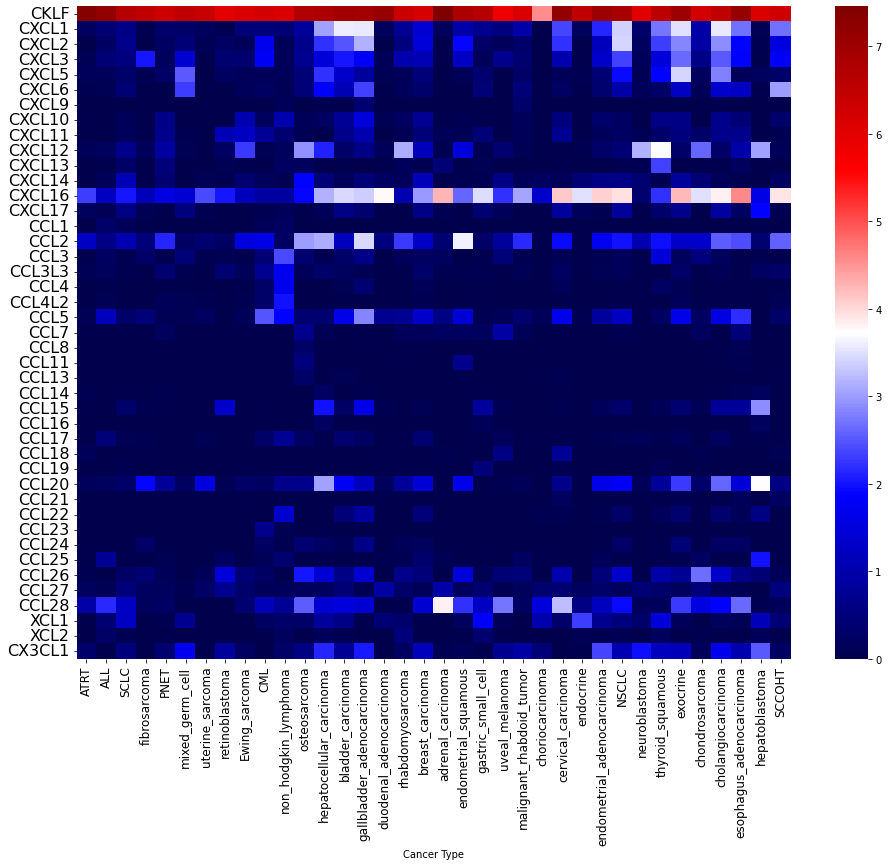

In [ ]:
%matplotlib inline
from bioinfokit import visuz
os.chdir(path2 + 'Output/Heatmap')
first_df = df.iloc[:36, :]
first_df
visuz.gene_exp.hmap(df=first_df.T, rowclus=False,tickfont=(12,16),colclus=False, dim=(16, 12), show=True)#r=600, figname = 'CKLF only')

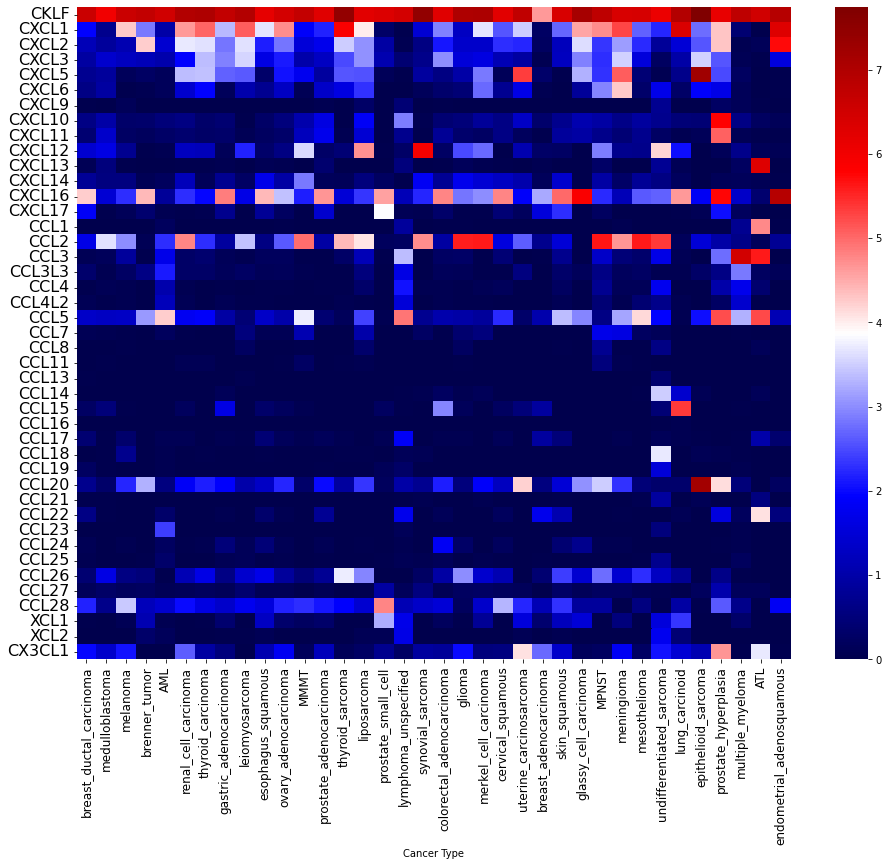

In [ ]:
rest_df = df.iloc[36:, :]
rest_df
visuz.gene_exp.hmap(df=rest_df.T, rowclus=False, colclus=False, dim=(16, 12), tickfont=(12, 16), show=True)# r=600, figname = 'CKLF and Other')